In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

In [5]:
df1 = pd.read_csv('ann-train.data', sep=' ', header=None)
df2 = pd.read_csv('ann-test.data', sep=' ', header=None)
df = pd.concat([df1, df2], ignore_index=True)
df = df.drop(df.columns[-2:], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.0150,0.120,0.082,0.1460,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0300,0.143,0.133,0.1080,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0240,0.102,0.131,0.0780,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.0170,0.077,0.090,0.0850,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.0260,0.139,0.090,0.1530,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.59,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.00250,0.0208,0.079,0.099,0.0800,3
7196,0.51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.10600,0.0060,0.005,0.089,0.0055,1
7197,0.51,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.00076,0.0201,0.090,0.067,0.1340,3
7198,0.35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00280,0.0201,0.090,0.089,0.1010,3


In [6]:
# Add generic column names (since the dataset has no headers)
num_attributes = 21
num_classes = 3 #Not actually used, just for documentation purposes.
column_names = [f'attr_{i}' for i in range(num_attributes)] + ['class']
df.columns = column_names

In [7]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   attr_0  attr_1  attr_2  attr_3  attr_4  attr_5  attr_6  attr_7  attr_8  \
0    0.73       0       1       0       0       0       0       0       1   
1    0.24       0       0       0       0       0       0       0       0   
2    0.47       0       0       0       0       0       0       0       0   
3    0.64       1       0       0       0       0       0       0       0   
4    0.23       0       0       0       0       0       0       0       0   

   attr_9  ...  attr_12  attr_13  attr_14  attr_15  attr_16  attr_17  attr_18  \
0       0  ...        0        0        0        0  0.00060    0.015    0.120   
1       0  ...        0        0        0        0  0.00025    0.030    0.143   
2       0  ...        0        0        0        0  0.00190    0.024    0.102   
3       0  ...        0        0        0        0  0.00090    0.017    0.077   
4       0  ...        0        0        0        0  0.00025    0.026    0.139   

   attr_19  attr_20  

In [8]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attr_0   7200 non-null   float64
 1   attr_1   7200 non-null   int64  
 2   attr_2   7200 non-null   int64  
 3   attr_3   7200 non-null   int64  
 4   attr_4   7200 non-null   int64  
 5   attr_5   7200 non-null   int64  
 6   attr_6   7200 non-null   int64  
 7   attr_7   7200 non-null   int64  
 8   attr_8   7200 non-null   int64  
 9   attr_9   7200 non-null   int64  
 10  attr_10  7200 non-null   int64  
 11  attr_11  7200 non-null   int64  
 12  attr_12  7200 non-null   int64  
 13  attr_13  7200 non-null   int64  
 14  attr_14  7200 non-null   int64  
 15  attr_15  7200 non-null   int64  
 16  attr_16  7200 non-null   float64
 17  attr_17  7200 non-null   float64
 18  attr_18  7200 non-null   float64
 19  attr_19  7200 non-null   float64
 20  attr_20  7200 non-null   float

In [9]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
            attr_0       attr_1       attr_2       attr_3       attr_4  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000   
mean      0.520518     0.304306     0.130556     0.015417     0.012778   
std       0.189269     0.460145     0.336937     0.123212     0.112322   
min       0.010000     0.000000     0.000000     0.000000     0.000000   
25%       0.370000     0.000000     0.000000     0.000000     0.000000   
50%       0.550000     0.000000     0.000000     0.000000     0.000000   
75%       0.670000     1.000000     0.000000     0.000000     0.000000   
max       0.970000     1.000000     1.000000     1.000000     1.000000   

            attr_5       attr_6       attr_7       attr_8       attr_9  ...  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000  ...   
mean      0.038333     0.010833     0.014028     0.016806     0.065556  ...   
std       0.192013     0.103525     0.117613     0.128551     0.247521 

In [10]:
# Check for missing values (NaNs)
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
attr_0     0
attr_1     0
attr_2     0
attr_3     0
attr_4     0
attr_5     0
attr_6     0
attr_7     0
attr_8     0
attr_9     0
attr_10    0
attr_11    0
attr_12    0
attr_13    0
attr_14    0
attr_15    0
attr_16    0
attr_17    0
attr_18    0
attr_19    0
attr_20    0
class      0
dtype: int64


In [11]:
print("\nClass distribution:")
print(df['class'].value_counts())


Class distribution:
class
3    6666
2     368
1     166
Name: count, dtype: int64


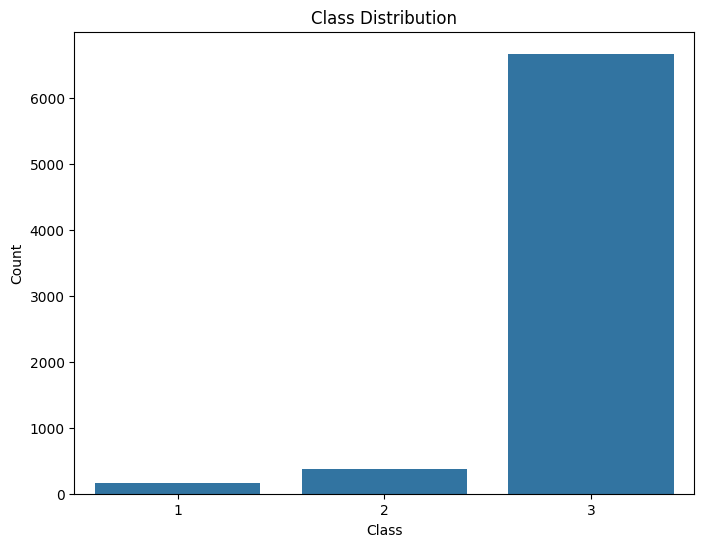

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

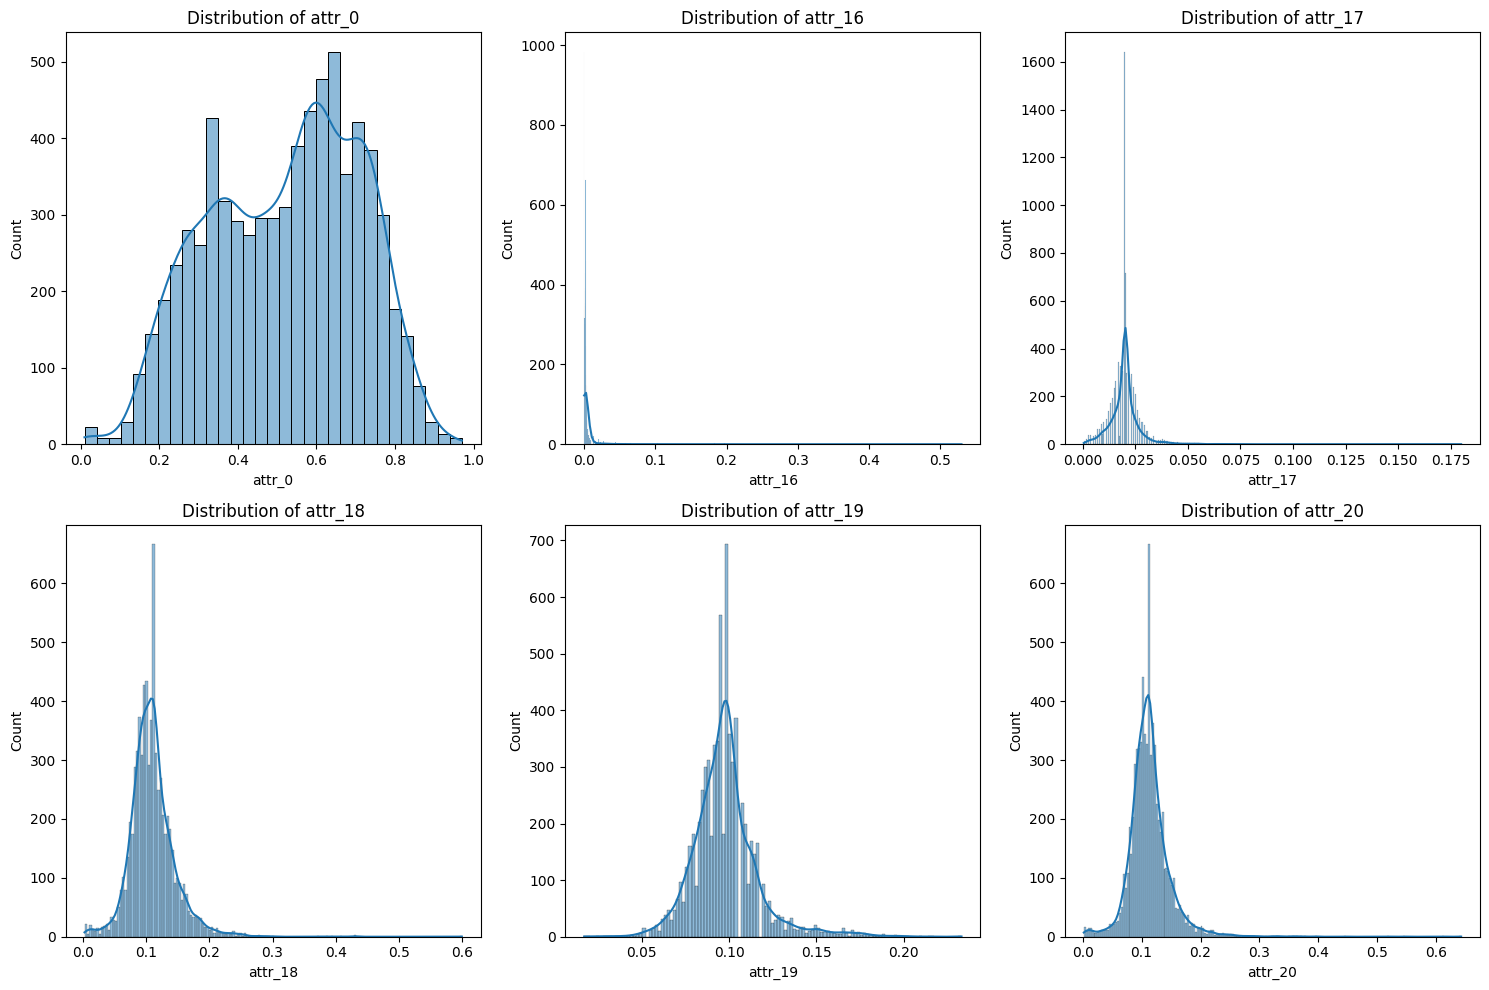

In [13]:
# Histograms for continuous features
X = df.drop('class', axis=1)
continuous_cols = [col for col in X.columns if X[col].dtype == 'float64']  # Identify continuous
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

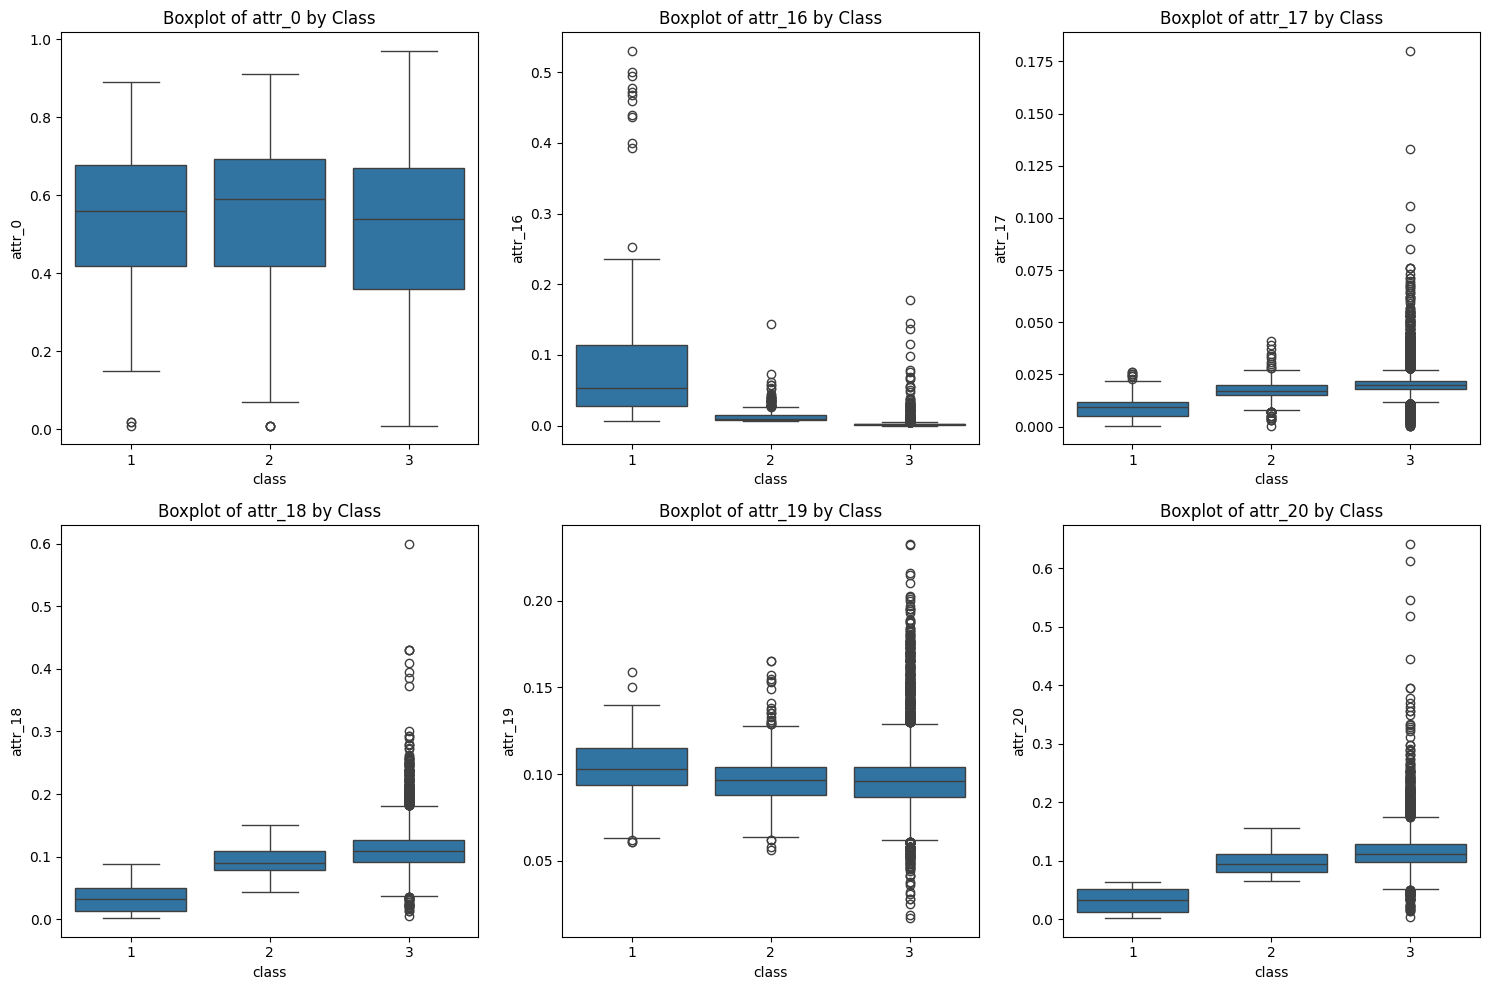

In [14]:
# Box plots for continuous features, separated by class
y = df['class']
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=y, y=X[col])
    plt.title(f'Boxplot of {col} by Class')
plt.tight_layout()
plt.show()

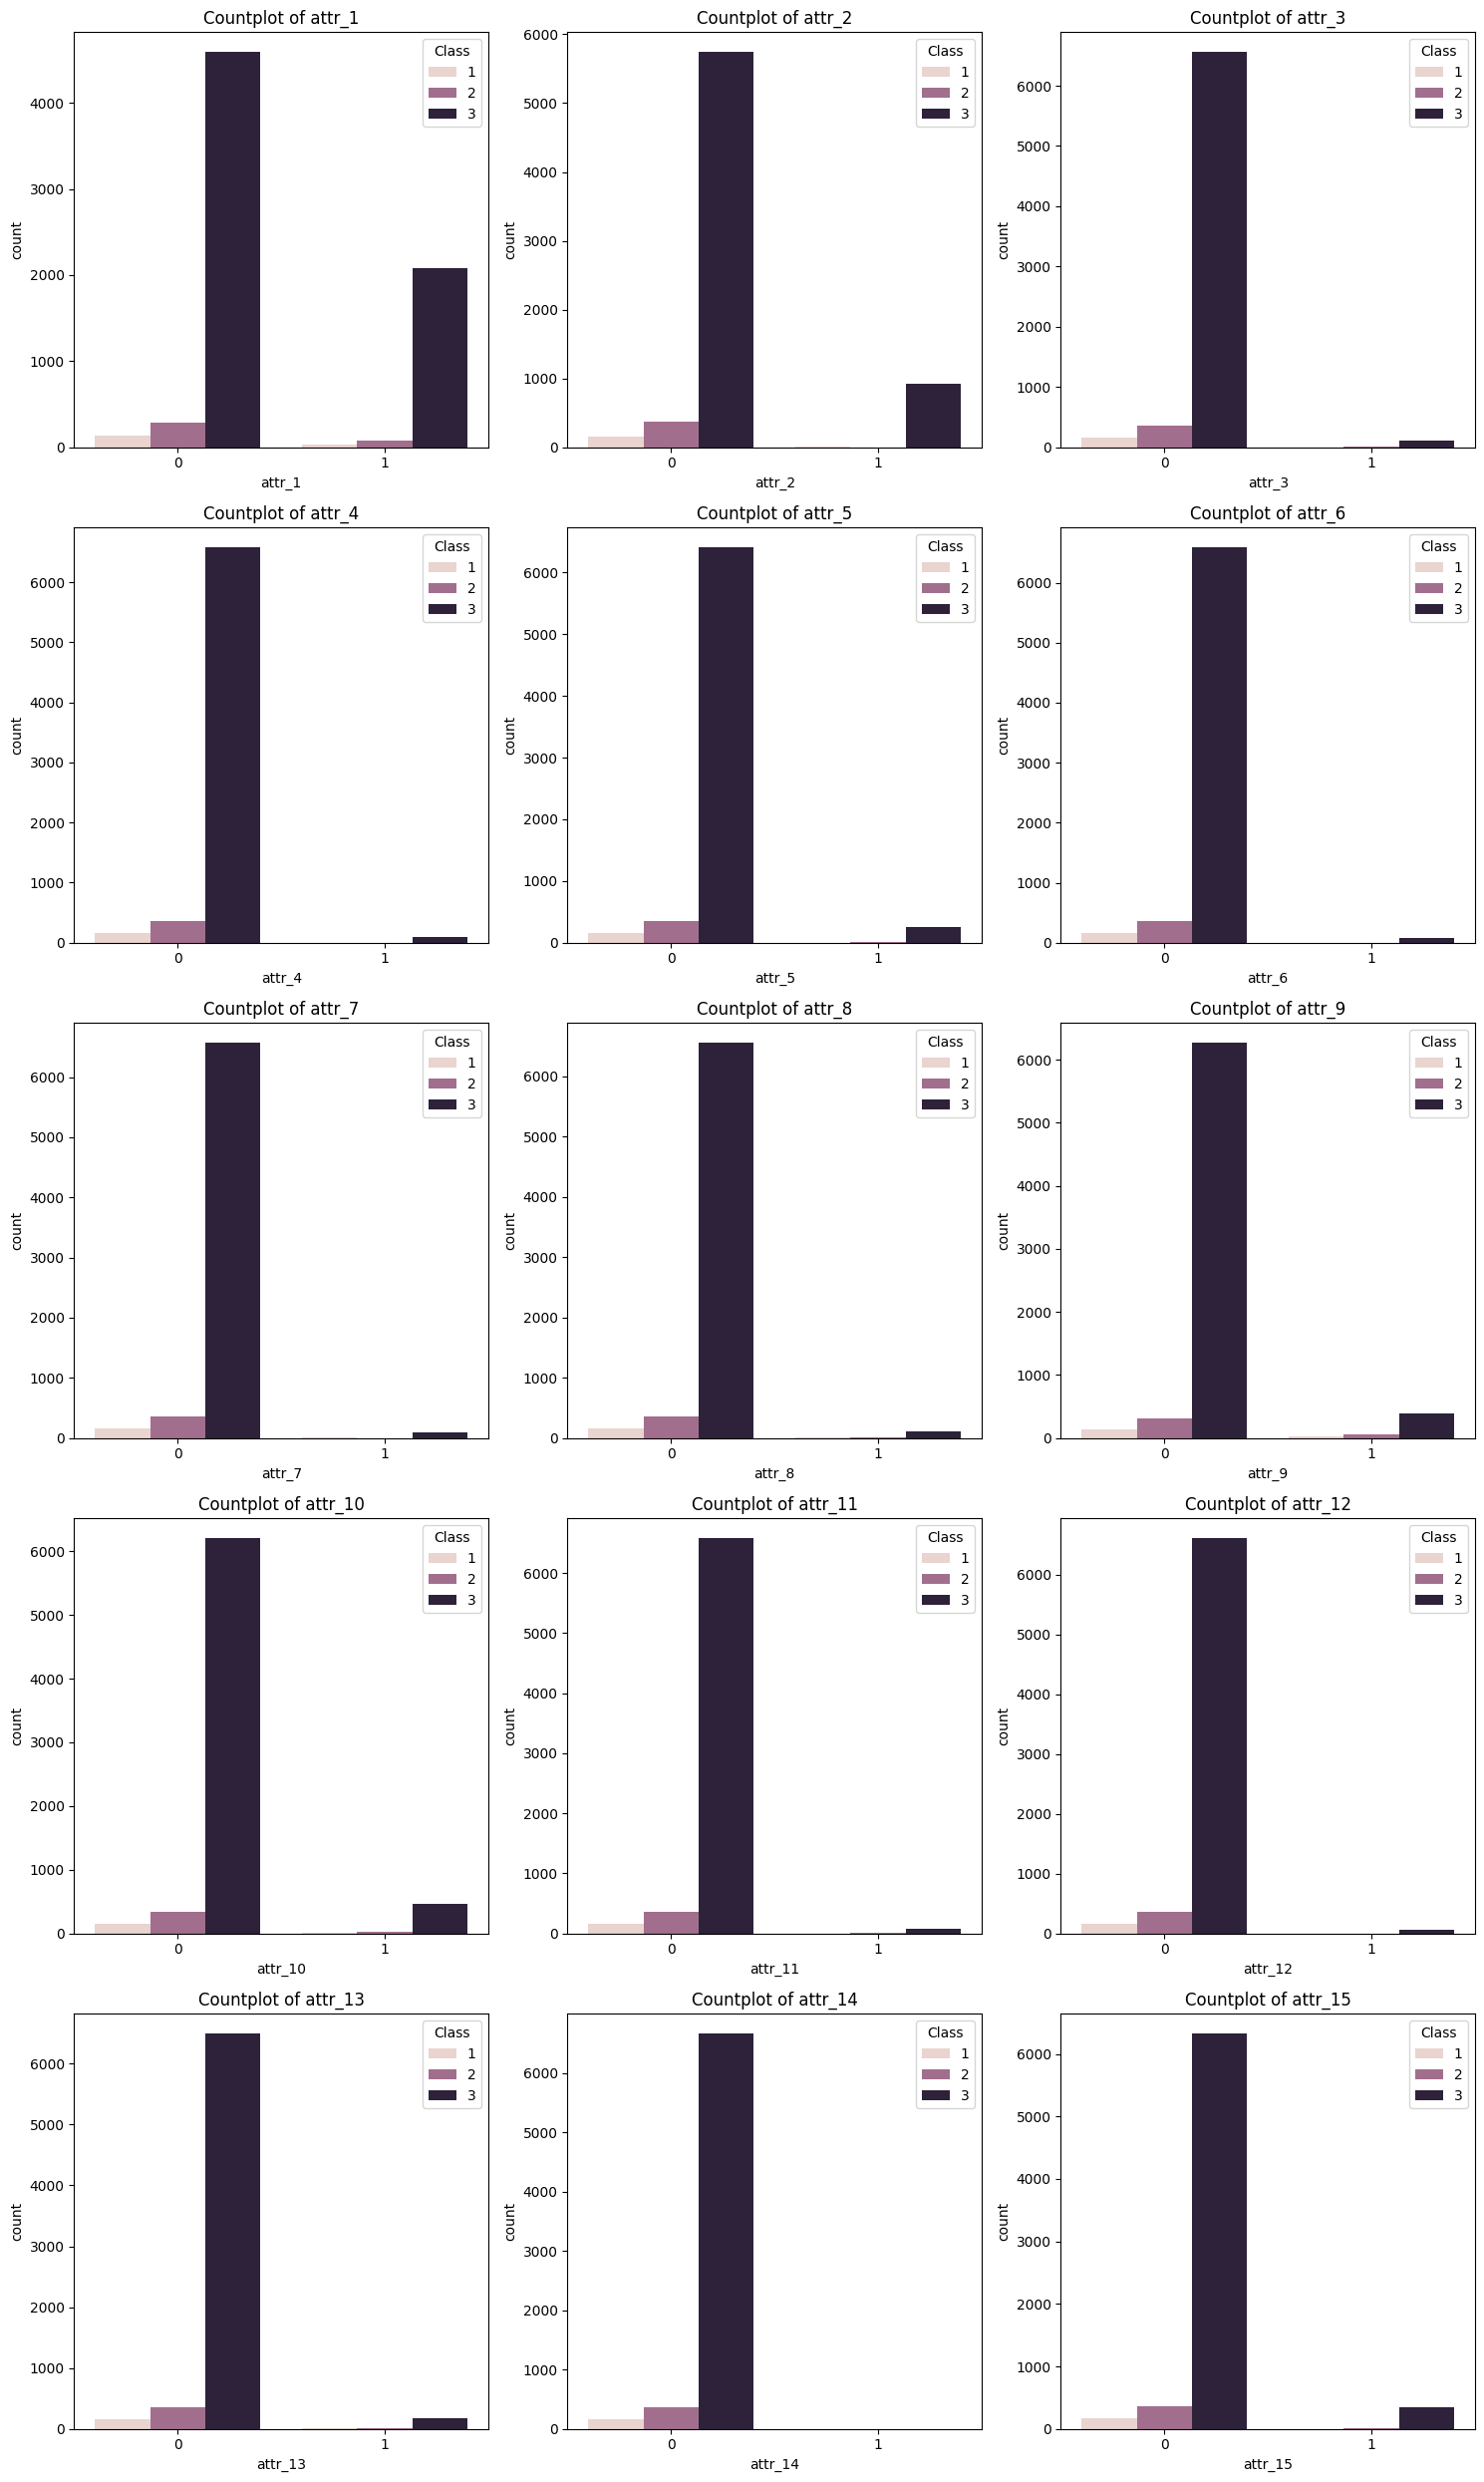

In [15]:
# Count plots for binary features
binary_cols = [col for col in X.columns if X[col].dtype == 'int64']

if binary_cols:  # Check if binary_cols is not empty
    num_binary_cols = len(binary_cols)
    num_rows = (num_binary_cols + 2) // 3  # Calculate rows needed for subplots
    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(binary_cols):
        plt.subplot(num_rows, 3, i + 1)
        sns.countplot(x=X[col], hue=y)
        plt.title(f'Countplot of {col}')
        plt.legend(title='Class')
    plt.tight_layout()
    plt.show()
else:
    print("No binary columns found.")

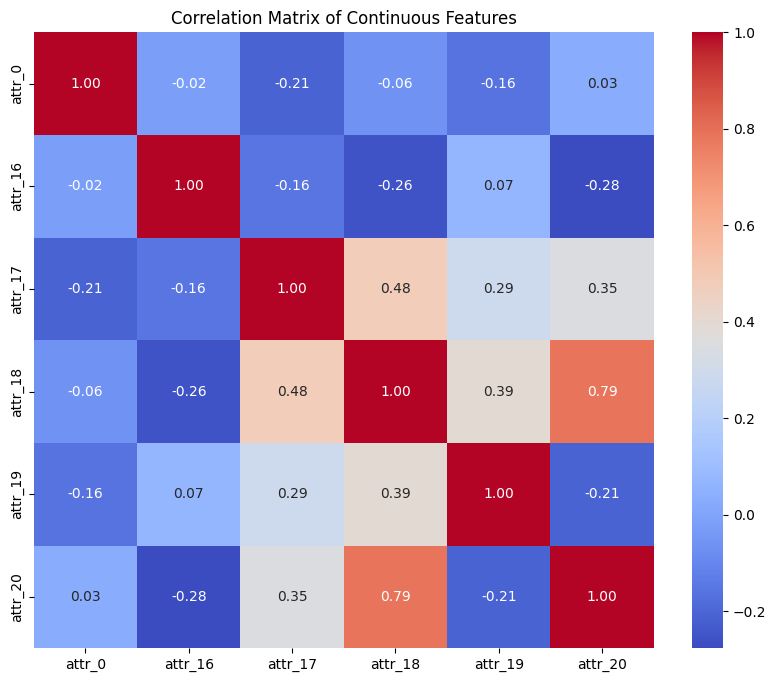

In [16]:
# Correlation matrix (for continuous features)
if continuous_cols:
    plt.figure(figsize=(10, 8))
    correlation_matrix = X[continuous_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Continuous Features')
    plt.show()
else:
     print("No continuous columns found for correlation matrix.")

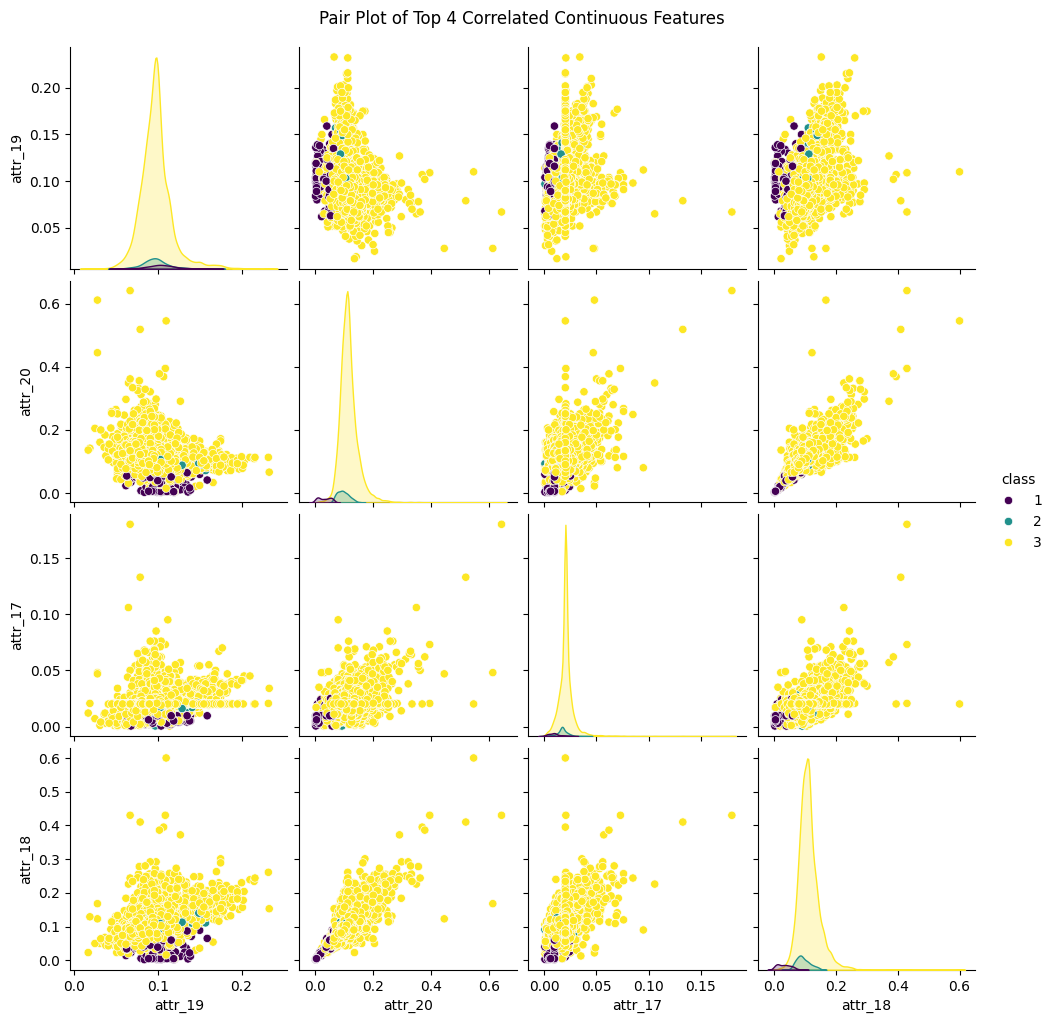

In [17]:
pairplot_df = X[continuous_cols].copy()
pairplot_df['class'] = y

if len(continuous_cols) > 0: #Check for columns
    if len(continuous_cols) <= 5:  # If 5 or fewer continuous, plot all
        sns.pairplot(pairplot_df, hue='class', palette='viridis')  # Choose a color palette
        plt.suptitle("Pair Plot of Continuous Features (All)", y=1.02)  # Add a title
        plt.show()
    else:
        num_to_plot = 5  # Number of continuous features to plot in the pairplot
        # Select the most correlated features
        correlation_matrix = X[continuous_cols].corr()
        # Get the absolute correlations with the target (we need to re-encode y_train for this)
        correlations_with_target = abs(correlation_matrix).unstack().sort_values(ascending=False)
        #Remove duplicates
        correlations_with_target = correlations_with_target[correlations_with_target.index.get_level_values(0) != correlations_with_target.index.get_level_values(1)]

        # Select the top N correlated features (excluding the target itself)
        top_n_correlated = correlations_with_target.head(num_to_plot)
        top_correlated_cols = list(set([item for sublist in top_n_correlated.index for item in sublist]))

        if 'class' in top_correlated_cols:
             top_correlated_cols.remove('class') #The class is already included

        sns.pairplot(pairplot_df[top_correlated_cols + ['class']], hue='class', palette='viridis')
        plt.suptitle(f"Pair Plot of Top {len(top_correlated_cols)} Correlated Continuous Features", y=1.02)
        plt.show()
else:
   print("There are no continuous features to do the pairplot")

In [18]:
from scipy.stats import f_oneway, ttest_ind

# ANOVA
print("\n--- ANOVA (Continuous Features) ---")
if len(np.unique(y)) > 2:  # Check if there are more than 2 classes
    for col in continuous_cols:
        groups = []
        for class_label in np.unique(y):
            groups.append(X[col][y == class_label])  # Filter by class

        # Perform ANOVA
        if len(groups)>1 and all(len(group) > 0 for group in groups): #Avoids errors caused by empty groups
            f_statistic, p_value = f_oneway(*groups)  # *groups unpacks the list
            print(f"Feature: {col}")
            print(f"  F-statistic: {f_statistic:.4f}")
            print(f"  P-value: {p_value:.4f}")

            # Interpretation
            if p_value < 0.05:
                print("  Significant difference between class means.")
            else:
                print("  No significant difference between class means.")
        else:
            print(f'{col} cannot perform ANOVA because there are empty groups')
else:
    print("ANOVA not applicable (only 2 or fewer classes).")


--- ANOVA (Continuous Features) ---
Feature: attr_0
  F-statistic: 6.6099
  P-value: 0.0014
  Significant difference between class means.
Feature: attr_16
  F-statistic: 2259.4126
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_17
  F-statistic: 199.8079
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_18
  F-statistic: 490.4078
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_19
  F-statistic: 6.6926
  P-value: 0.0012
  Significant difference between class means.
Feature: attr_20
  F-statistic: 548.5141
  P-value: 0.0000
  Significant difference between class means.


In [19]:
print("\n--- t-tests (Continuous Features) ---")
unique_classes = np.unique(y)

if len(unique_classes) == 2:
    # Only one t-test needed
        class1_data = X[y == unique_classes[0]]
        class2_data = X[y == unique_classes[1]]

        for col in continuous_cols:
            if len(class1_data[col])>0 and len(class2_data[col])>0: #Avoid errors with empty arrays
                t_statistic, p_value = ttest_ind(class1_data[col], class2_data[col])
                print(f"Feature: {col}")
                print(f"  T-statistic: {t_statistic:.4f}")
                print(f"  P-value: {p_value:.4f}")

                if p_value < 0.05:
                  print("  Significant difference between class means.")
                else:
                  print("  No significant difference between class means.")
            else:
               print(f'{col} cannot perform t-test (empty arrays)')
elif len(unique_classes) >2:
    # Loop for combinations
        for i in range(len(unique_classes)):
            for j in range(i + 1, len(unique_classes)):
                class1 = unique_classes[i]
                class2 = unique_classes[j]
                class1_data = X[y == class1]
                class2_data = X[y == class2]

                for col in continuous_cols:
                  if len(class1_data[col])>0 and len(class2_data[col])>0: #Avoids errors caused by empty arrays
                    t_statistic, p_value = ttest_ind(class1_data[col], class2_data[col])
                    print(f"Feature: {col}, Class {class1} vs Class {class2}")
                    print(f"  T-statistic: {t_statistic:.4f}")
                    print(f"  P-value: {p_value:.4f}")

                    if p_value < 0.05:
                        print("  Significant difference between class means.")
                    else:
                        print("  No significant difference between class means.")
                  else:
                    print(f'{col} cannot perform t-test (empty arrays)')


--- t-tests (Continuous Features) ---
Feature: attr_0, Class 1 vs Class 2
  T-statistic: -1.0077
  P-value: 0.3141
  No significant difference between class means.
Feature: attr_16, Class 1 vs Class 2
  T-statistic: 13.8441
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_17, Class 1 vs Class 2
  T-statistic: -14.5425
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_18, Class 1 vs Class 2
  T-statistic: -30.6567
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_19, Class 1 vs Class 2
  T-statistic: 3.3601
  P-value: 0.0008
  Significant difference between class means.
Feature: attr_20, Class 1 vs Class 2
  T-statistic: -34.6956
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_0, Class 1 vs Class 3
  T-statistic: 1.1750
  P-value: 0.2400
  No significant difference between class means.
Feature: attr_16, Class 1 vs Class 3
  T-statistic: 65.5437
  P-value: 0.0000
  Signific

In [20]:
print("\n--- t-tests (Binary Features) ---")
if len(unique_classes) == 2:
    #Only one t-test needed.
    class1_data = X[y == unique_classes[0]]
    class2_data = X[y == unique_classes[1]]

    for col in binary_cols:
        if len(class1_data[col])>0 and len(class2_data[col])>0:
            t_statistic, p_value = ttest_ind(class1_data[col].astype(int), class2_data[col].astype(int))  # Convert to int
            print(f"Feature: {col}")
            print(f"  T-statistic: {t_statistic:.4f}")
            print(f"  P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  Significant difference between class means.")
            else:
                print("  No significant difference between class means.")
        else:
          print(f'{col} cannot perform t-test (empty arrays)')

elif len(unique_classes) >2:
    for i in range(len(unique_classes)):
      for j in range(i + 1, len(unique_classes)):
        class1 = unique_classes[i]
        class2 = unique_classes[j]
        class1_data = X[y == class1]
        class2_data = X[y == class2]
        for col in binary_cols:
            if len(class1_data[col])>0 and len(class2_data[col])>0:
                t_statistic, p_value = ttest_ind(class1_data[col].astype(int), class2_data[col].astype(int)) #Convert to integers
                print(f"Feature: {col}, Class {class1} vs Class {class2}")
                print(f"  T-statistic: {t_statistic:.4f}")
                print(f"  P-value: {p_value:.4f}")
                if p_value < 0.05:
                  print("  Significant difference between class means.")
                else:
                  print("  No significant difference between class means.")
            else:
                print(f'{col} cannot perform t-test (empty arrays)')


--- t-tests (Binary Features) ---
Feature: attr_1, Class 1 vs Class 2
  T-statistic: -0.3971
  P-value: 0.6914
  No significant difference between class means.
Feature: attr_2, Class 1 vs Class 2
  T-statistic: 6.4676
  P-value: 0.0000
  Significant difference between class means.
Feature: attr_3, Class 1 vs Class 2
  T-statistic: -1.5093
  P-value: 0.1318
  No significant difference between class means.
Feature: attr_4, Class 1 vs Class 2
  T-statistic: -0.2635
  P-value: 0.7923
  No significant difference between class means.
Feature: attr_5, Class 1 vs Class 2
  T-statistic: -2.2887
  P-value: 0.0225
  Significant difference between class means.
Feature: attr_6, Class 1 vs Class 2
  T-statistic: nan
  P-value: nan
  No significant difference between class means.
Feature: attr_7, Class 1 vs Class 2
  T-statistic: 3.0087
  P-value: 0.0027
  Significant difference between class means.
Feature: attr_8, Class 1 vs Class 2
  T-statistic: 1.4318
  P-value: 0.1528
  No significant differen

In [21]:
#Chi-squared tests for binary features:
from scipy.stats import chi2_contingency

print("\n--- Chi-squared Tests (Binary Features) ---")

for col in binary_cols:
    contingency_table = pd.crosstab(X[col], y)
    if contingency_table.shape == (2, len(unique_classes)):  # Check for valid dimensions
      chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

      print(f"Feature: {col}")
      print(f"  Chi2 Statistic: {chi2_stat:.4f}")
      print(f"  P-value: {p_val:.4f}")
      print(f"  Degrees of Freedom: {dof}")
      # print(f"  Expected Frequencies:\n{expected}") # Optional

      if p_val < 0.05:
        print("  Significant association between feature and class.")
      else:
        print("  No significant association between feature and class.")
    else:
      print(f"Skipping Chi-squared for {col} due to invalid contingency table dimensions.")


--- Chi-squared Tests (Binary Features) ---
Feature: attr_1
  Chi2 Statistic: 21.6824
  P-value: 0.0000
  Degrees of Freedom: 2
  Significant association between feature and class.
Feature: attr_2
  Chi2 Statistic: 60.0901
  P-value: 0.0000
  Degrees of Freedom: 2
  Significant association between feature and class.
Feature: attr_3
  Chi2 Statistic: 2.7837
  P-value: 0.2486
  Degrees of Freedom: 2
  No significant association between feature and class.
Feature: attr_4
  Chi2 Statistic: 1.3192
  P-value: 0.5171
  Degrees of Freedom: 2
  No significant association between feature and class.
Feature: attr_5
  Chi2 Statistic: 5.0139
  P-value: 0.0815
  Degrees of Freedom: 2
  No significant association between feature and class.
Feature: attr_6
  Chi2 Statistic: 6.3169
  P-value: 0.0425
  Degrees of Freedom: 2
  Significant association between feature and class.
Feature: attr_7
  Chi2 Statistic: 6.5846
  P-value: 0.0372
  Degrees of Freedom: 2
  Significant association between feature and